# FATALITY ANALYSIS REPORTING SYSTEM (FARS)

## 1 : Summary
### From given data we have analyzed the major cause of  accident fatality and severity.We also have gathered three important variables causing fatal accidents . 
### We have used python libraries for exploratory data analysis as follow
     1: Pandas 
     2: Numpy
     3: Seaborn
#### *Note : Before every code segment we have described the operation.


## 2 : Three variables causing fatal accidents.
 ### 1 : Light Condition
 ### 2 : High Speed 
 ### 3 : Body Type of car
     * Airbag is an also important feature to notice
## 3 : Recommendations to improve the current state of accidents
 ### 1 : Providing required and suitable light on roads and avoiding driving at night.
     *Note : Try to avoid extreme light conditions also , eg. Snow covered roads reflects extream light.
 ### 2 : Strictly following road speed limits and other trafic rules 
 ### 3 : Avoid purchasing car with body type ‘4’ which is highly involved in accidents.
 ### 4 : Using restraints carefully and travellers with age more than 60 to prefer sitting on back seats of car for least severity 


##### Importing Libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from numpy import mean
matplotlib.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
from collections import Counter

In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import scale
from sklearn.neural_network import MLPClassifier

##### Reading and Cleaning Data 

In [4]:
datadf= pd.read_csv('fars2007.csv')

In [5]:
datadf.head()

,Unnamed: 0,Obs.,state,casenum,vnum,pnum,lightcond,numfatal,vforms,age,...,sex,body,inimpact,mhevent,vfatcount,numoccs,travspd,make,model,modelyr
0,1,1,1,1,1,1,2,1,1,26,...,1,4,9.0,42,1,1,65.0,37,32,1992
1,2,2,1,2,1,1,1,2,3,54,...,2,4,12.0,12,0,1,10.0,35,39,1990
2,3,3,1,2,2,1,1,2,3,68,...,1,4,7.0,12,2,2,55.0,19,3,1993
3,4,4,1,2,2,2,1,2,3,59,...,1,4,7.0,12,2,2,55.0,19,3,1993
4,5,5,1,2,3,1,1,2,3,69,...,1,31,12.0,12,0,1,55.0,12,481,2004


In [6]:
datadf.shape

(72548, 25)

In [7]:
datadf=datadf.drop(columns="Unnamed: 0")

In [8]:
datadf=datadf.dropna()

In [9]:
datadf.head()

,Obs.,state,casenum,vnum,pnum,lightcond,numfatal,vforms,age,airbag,...,sex,body,inimpact,mhevent,vfatcount,numoccs,travspd,make,model,modelyr
0,1,1,1,1,1,2,1,1,26,1,...,1,4,9.0,42,1,1,65.0,37,32,1992
1,2,1,2,1,1,1,2,3,54,30,...,2,4,12.0,12,0,1,10.0,35,39,1990
2,3,1,2,2,1,1,2,3,68,30,...,1,4,7.0,12,2,2,55.0,19,3,1993
3,4,1,2,2,2,1,2,3,59,30,...,1,4,7.0,12,2,2,55.0,19,3,1993
4,5,1,2,3,1,1,2,3,69,1,...,1,31,12.0,12,0,1,55.0,12,481,2004


In [10]:
Counter(datadf)

Counter({'Obs.': 1,
         'state': 1,
         'casenum': 1,
         'vnum': 1,
         'pnum': 1,
         'lightcond': 1,
         'numfatal': 1,
         'vforms': 1,
         'age': 1,
         'airbag': 1,
         'injury': 1,
         'ptype': 1,
         'restraint': 1,
         'seatpos': 1,
         'sex': 1,
         'body': 1,
         'inimpact': 1,
         'mhevent': 1,
         'vfatcount': 1,
         'numoccs': 1,
         'travspd': 1,
         'make': 1,
         'model': 1,
         'modelyr': 1})

In [11]:
Counter(datadf.lightcond)

Counter({2: 19568, 1: 38190, 3: 11748, 4: 1202, 5: 1600, 9: 238})

In [12]:
total_traffic_fatalities = datadf.numfatal.sum()
print("2007 Traffic Fatalities: ", total_traffic_fatalities)

2007 Traffic Fatalities:  84814


##### Low light is an extreme factor in major car accidents 

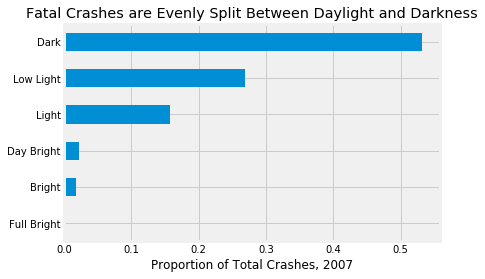

In [13]:
light_group = datadf.groupby(['lightcond']).sum()['numfatal']
labels = ['Dark','Low Light','Light','Bright','Day Bright','Full Bright']
light_group.index = labels
light_group=light_group.sort_values()
(light_group /  light_group.sum()).plot(kind='barh')

plt.title('Fatal Crashes are Evenly Split Between Daylight and Darkness')
plt.xlabel('Proportion of Total Crashes, 2007')

plt.show()

#### Understading corrolation of data 

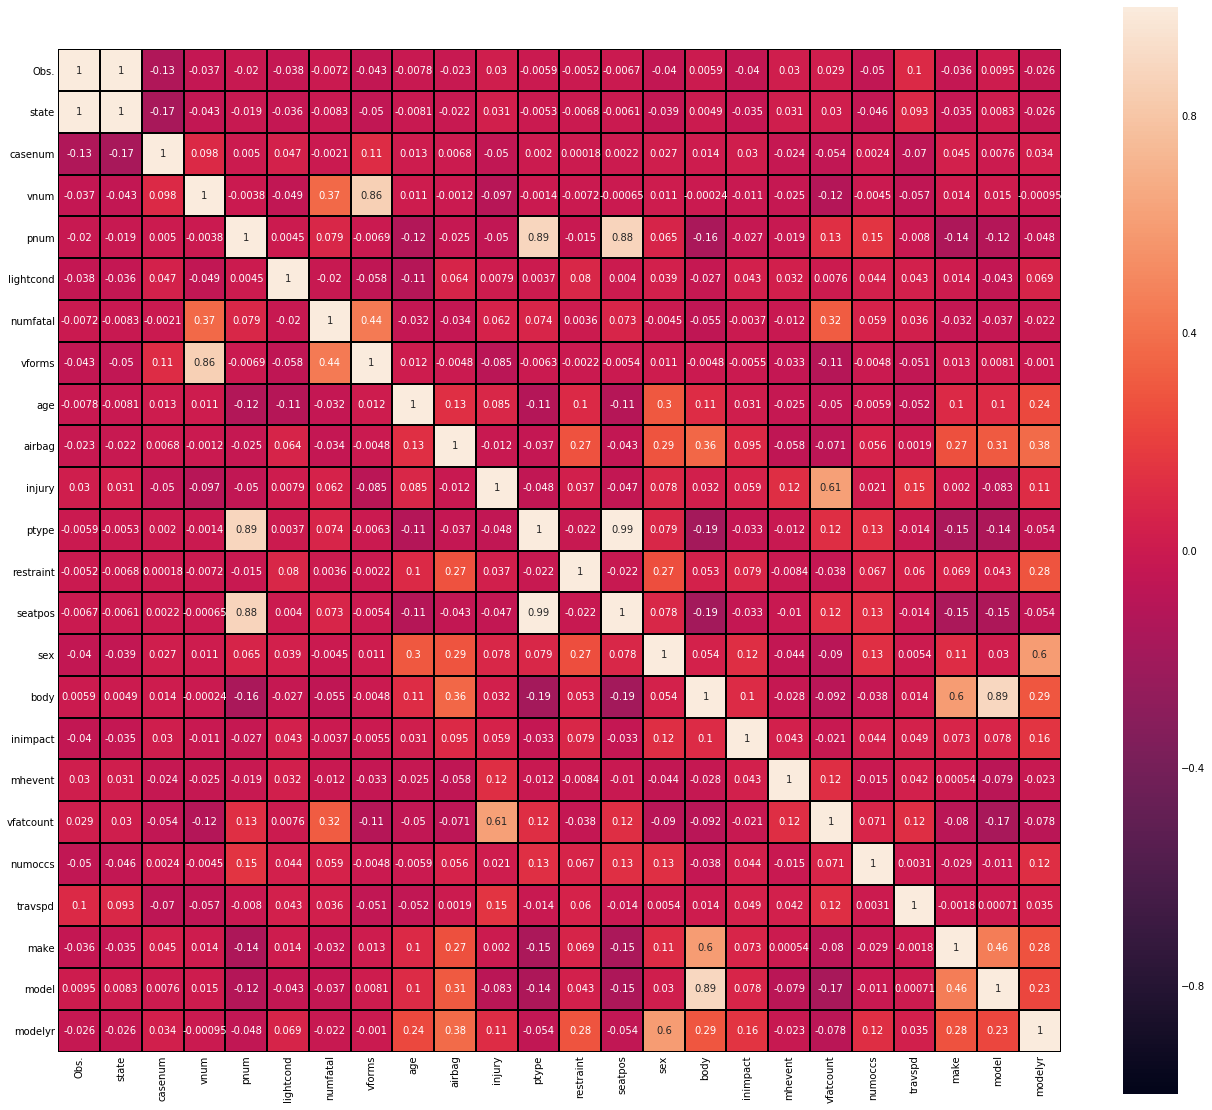

In [14]:
fig=plt.gcf()
fig.set_size_inches(20,20)
fig=sns.heatmap(datadf.corr(),annot=True,linewidths=1,linecolor='k',square=True,mask=False, vmin=-1, vmax=1,cbar_kws={"orientation": "vertical"},cbar=True)

#### In 2007’s car accident fatalities specific car manufacturers are not responsible.
#### Some car companies shows more involvement more than other companies but not specifically to consider as important factor . 


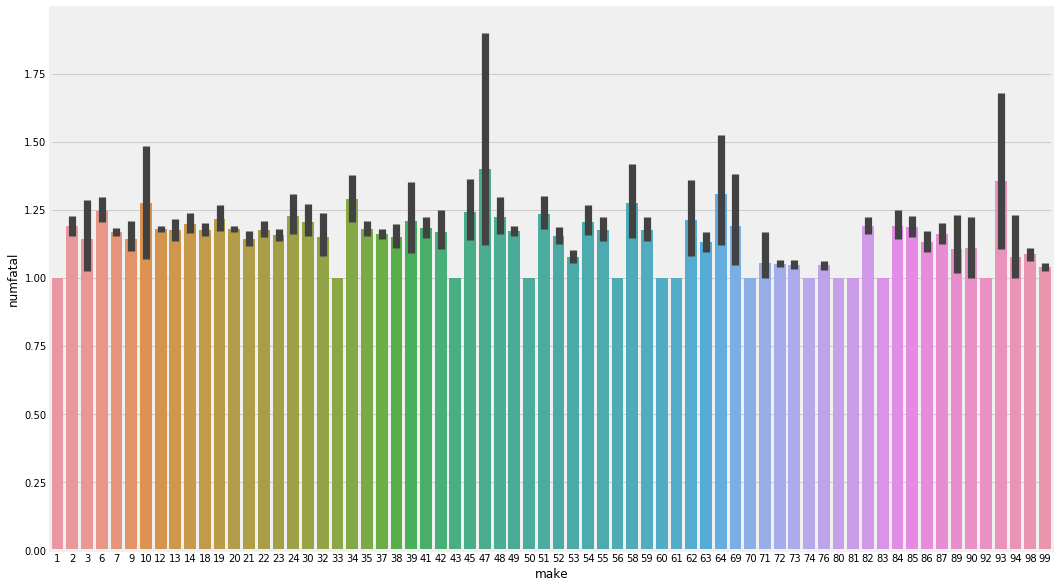

In [15]:
fig_dims = (16,10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x='make',y='numfatal',ax=ax,data=datadf)

#### We have seen age factor in injury severity, people involved in accidents having age more than 60+ are facing more severity. Thus we have assumed medication and less visual strength are the cause of it (Ref. NHTSA Reports) .


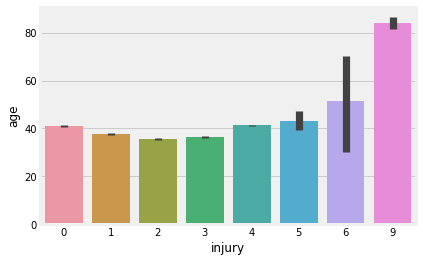

In [16]:
sns.barplot(x='injury',y='age',data=datadf)

#### Cars involved in accidents having airbag ‘28’ are showing a large number of fatalities as compared with other types of airbags. We have considered ‘airbag’ is an important factor for ML Model.


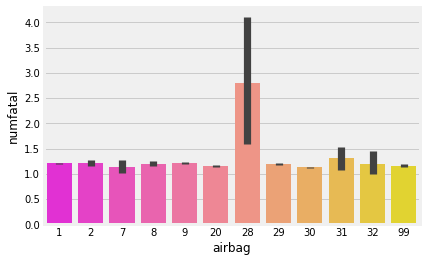

In [17]:
sns.barplot(x='airbag',y='numfatal',data=datadf, palette = 'spring')

#### All genders are impacted similarly in accidents 


In [18]:
Counter(datadf.sex)

Counter({1: 49456, 2: 22192, 9: 898})

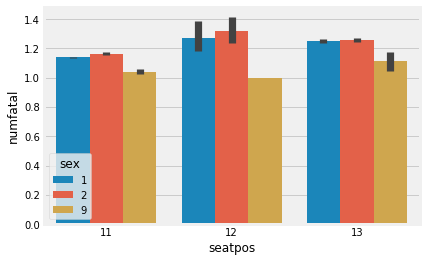

In [19]:
sns.barplot(x='seatpos',y='numfatal',hue='sex',data=datadf)

### We are analysing statewise acidents 
#### we found out State '6' , '48' , '12' are having highest number of accidents.

In [20]:
datadf.groupby('state')['Obs.'].count().reset_index(name = 'count').sort_values(by = 'count', ascending = False).head(5)

,state,count
4,6,7249
43,48,6199
9,12,5859
10,13,3001
33,37,2906


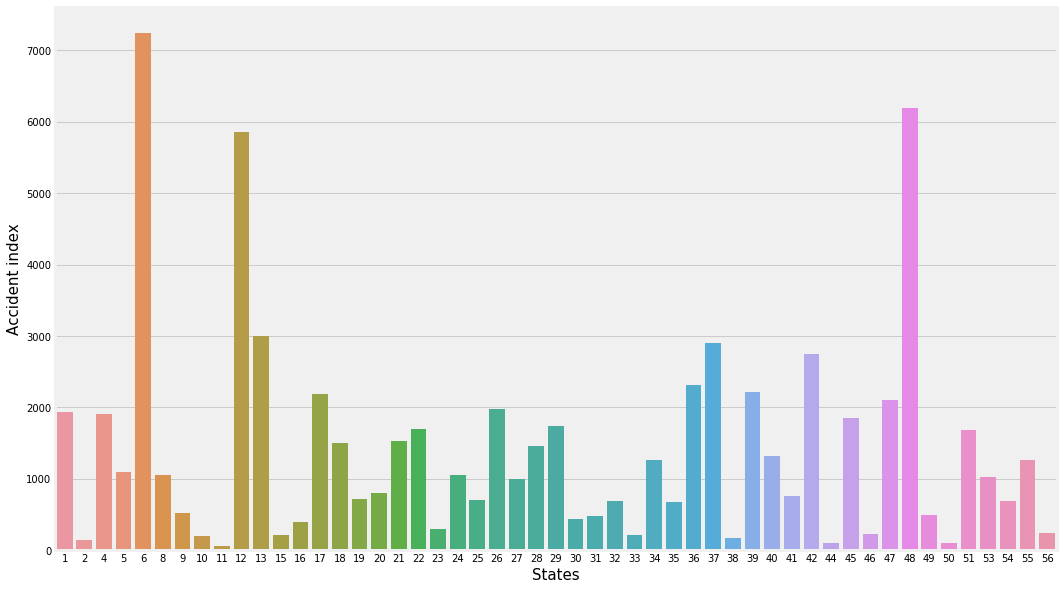

In [21]:
states = datadf.state.unique()
count_by_state=[]
for i in datadf.state.unique():
    count_by_state.append(datadf[datadf['state']==i].count()['Obs.'])

fig,ax = plt.subplots(figsize=(16,10))
plt.ylabel("Accident index", fontsize=(15))
plt.xlabel("States", fontsize=(15))
sns.barplot(states,count_by_state)

### Light condition is an extremely important factor in this scenario 
#### We have found following insights about Light condition in accidents.
    Lowest light condition causing major accidents (1)
    52.6 % Accidents are occured in lowest light availability (2)
    we also have marked from FARS data that lowest light condition also causing higher Severity (3)
 
### *Note  : We have considered 'lightcond' as feature in ML Model    

## fig 1

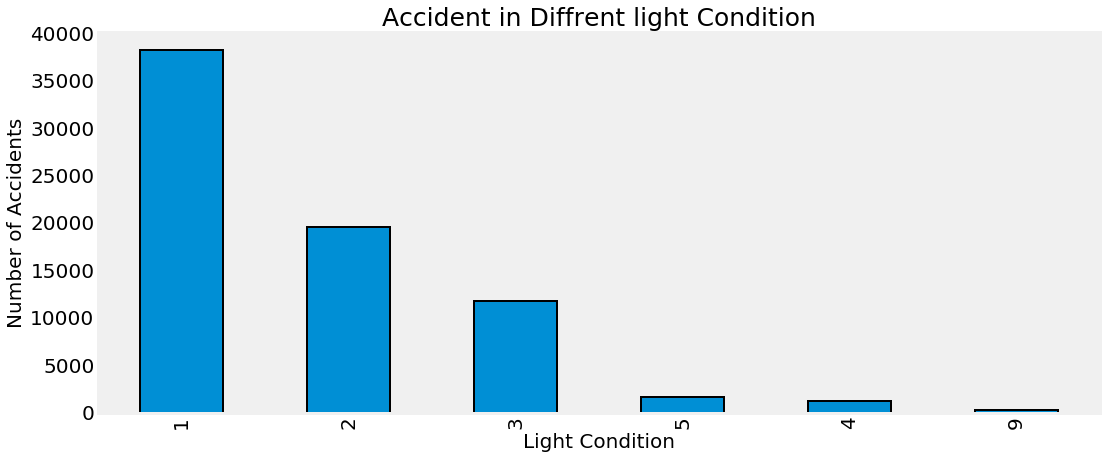

In [22]:
fig, ax=plt.subplots(figsize=(16,7))
datadf['lightcond'].value_counts().sort_values(ascending=False).head(6).plot.bar(width=0.5,edgecolor='k',align='center',linewidth=2)
plt.xlabel('Light Condition',fontsize=20)
plt.ylabel('Number of Accidents',fontsize=20)
ax.tick_params(labelsize=20)
plt.title('Accident in Diffrent light Condition',fontsize=25)
plt.grid()
plt.ioff()

## Fig 2

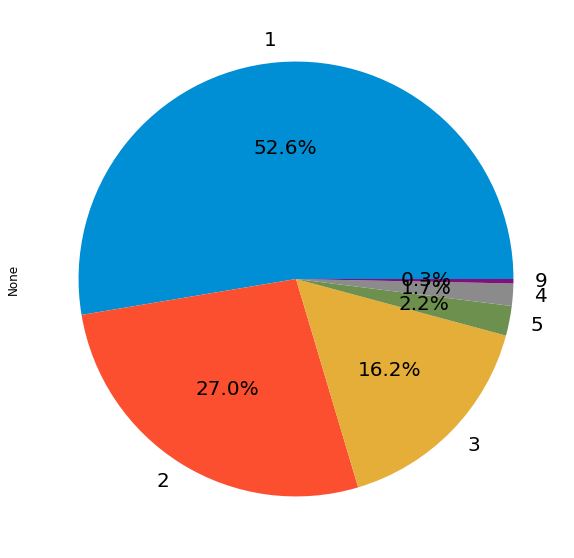

In [23]:
plt.figure(figsize=(10,10))
df = datadf
df.groupby(['lightcond']).size().nlargest(10).plot.pie(autopct='%1.1f%%', fontsize=(20))

## Fig 3

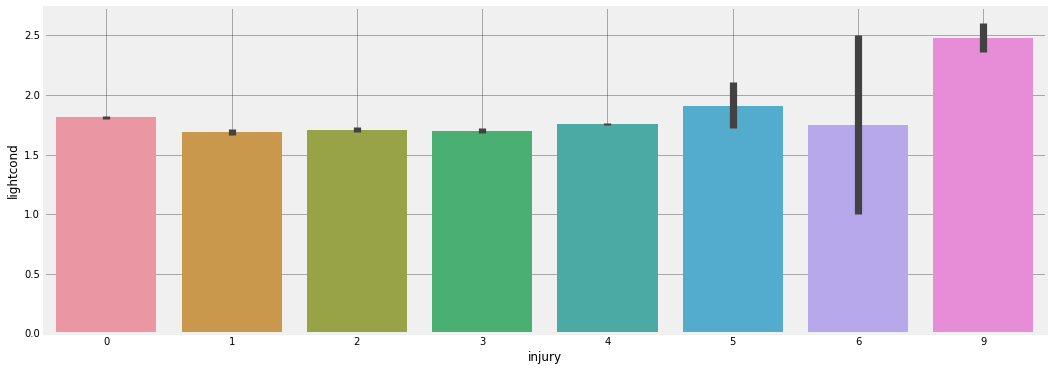

In [24]:
plt.figure(figsize=(16, 6))
sns.barplot(x='injury',y='lightcond',data=datadf)
plt.grid(color='black', linestyle='-', linewidth=1, alpha=0.3)

### Understanding Injury Severity
    we have found that higher number of victims have faced 4th category severity.
    we also considered light condition against severity and we have found out that brighest light condition caused remarkable severity numbers

In [25]:
Counter(datadf.injury)

Counter({4: 32025, 1: 5800, 0: 17027, 3: 8108, 9: 590, 2: 8833, 5: 159, 6: 4})

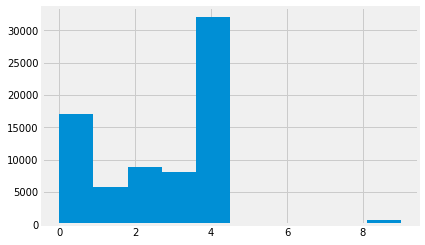

In [26]:
datadf['injury'].hist(bins=10) 

In [27]:
Counter(datadf.injury)

Counter({4: 32025, 1: 5800, 0: 17027, 3: 8108, 9: 590, 2: 8833, 5: 159, 6: 4})

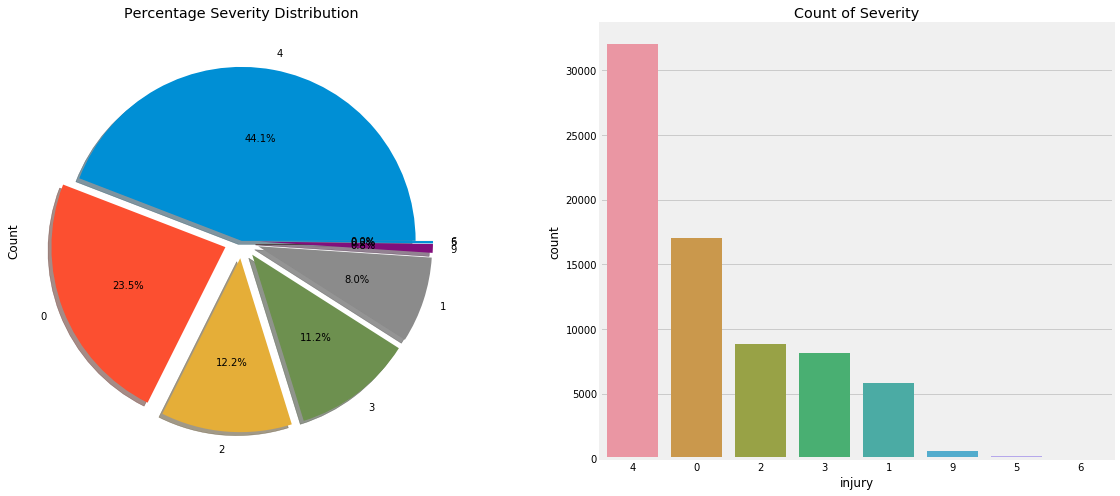

In [28]:
f,ax=plt.subplots(1,2,figsize=(18,8))
datadf['injury'].value_counts().plot.pie(explode=[0,0.1,0.1,0.1,0.1,0.1,0.1,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Percentage Severity Distribution')
ax[0].set_ylabel('Count')
sns.countplot('injury',data=datadf,ax=ax[1],order=datadf['injury'].value_counts().index)
ax[1].set_title('Count of Severity')
plt.show()

(array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. ]),
 <a list of 9 Text yticklabel objects>)

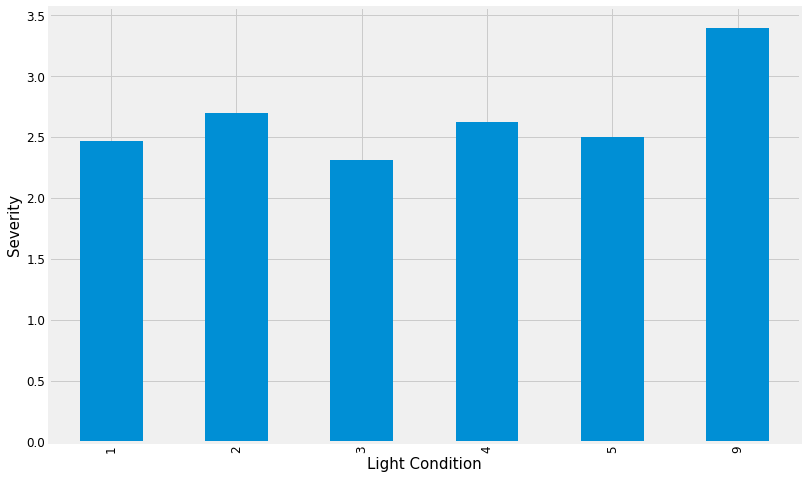

In [29]:
plt.figure(figsize=(12,8))
df = datadf.groupby(['lightcond'])
df.injury.mean().plot(kind='bar')
plt.ylabel("Severity", fontsize=(15))
plt.xlabel("Light Condition", fontsize=(15))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

In [30]:
Counter(datadf.lightcond)

Counter({2: 19568, 1: 38190, 3: 11748, 4: 1202, 5: 1600, 9: 238})

## High speed driving is an another most important feature we have considered

### *Note : we have used this feature for ML Model

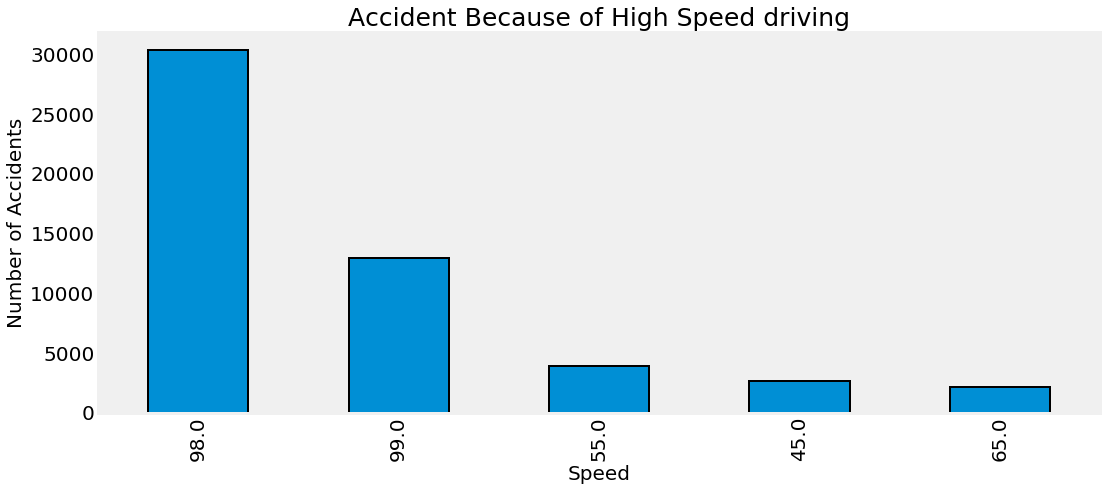

In [31]:
fig, ax=plt.subplots(figsize=(16,7))
datadf['travspd'].value_counts().sort_values(ascending=False).head(5).plot.bar(width=0.5,edgecolor='k',align='center',linewidth=2)
plt.xlabel('Speed',fontsize=20)
plt.ylabel('Number of Accidents',fontsize=20)
ax.tick_params(labelsize=20)
plt.title('Accident Because of High Speed driving',fontsize=25)
plt.grid()
plt.ioff()

## Car Body type is considerable in this senario
    we found out that type '4' car is facing huge number of accidents as compared with other car types 

### *Note :  we have used this feature for ML Model

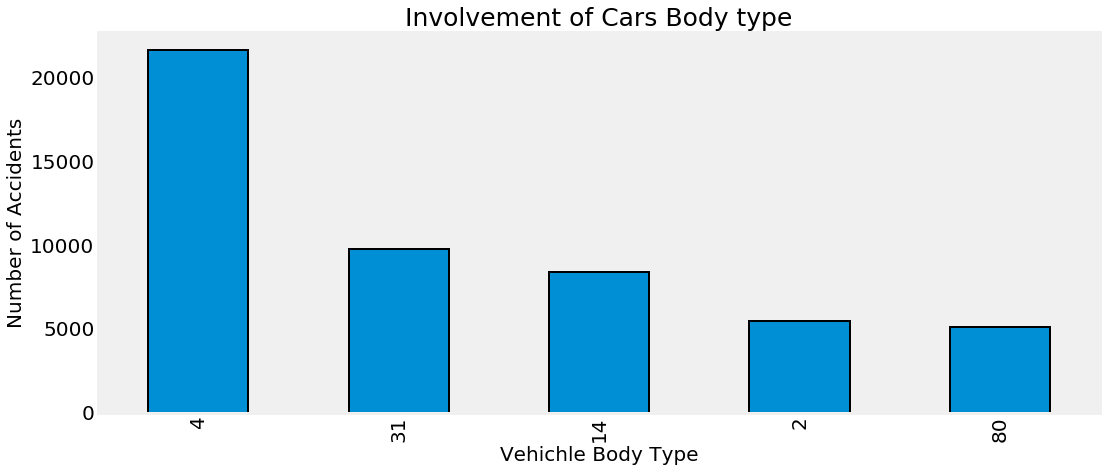

In [32]:
fig, ax=plt.subplots(figsize=(16,7))
datadf['body'].value_counts().sort_values(ascending=False).head(5).plot.bar(width=0.5,edgecolor='k',align='center',linewidth=2)
plt.xlabel('Vehichle Body Type',fontsize=20)
plt.ylabel('Number of Accidents',fontsize=20)
ax.tick_params(labelsize=20)
plt.title('Involvement of Cars Body type',fontsize=25)
plt.grid()
plt.ioff()

# ML Models

## Random Forest Model
    We have used Light condition , Airbag , Restaint , Travel Speed and Car Body Type as input features and Number of Fatalities as Target variable 

In [33]:
X=datadf.loc[:,['lightcond',
                'airbag',
                'restraint',
                'travspd',
                'body']]
y=datadf.numfatal

In [34]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=20,test_size=0.1)

In [35]:
model=RandomForestClassifier(max_depth=8,random_state=20,n_estimators=300,criterion='gini')

In [36]:
model.fit(X_train,y_train)
y_predict=model.predict(X_test)

In [37]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict)*100

87.51206064782909

## Neural network (MLP Class)

In [39]:
X=scale(X)
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=10)

F:\pythonds\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.


In [43]:
model=MLPClassifier(hidden_layer_sizes=(150,100))
model.fit(X_train,y_train)
y_predict=model.predict(X_test)
accuracy_score(y_test,y_predict)*100

F:\pythonds\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


87.8039367039753

In [41]:
pd.crosstab(y_test,y_predict)

col_0,1,2,3,4,8
numfatal,,,,,
1,15925,6,3,2,1
2,1742,1,0,0,0
3,304,0,11,0,0
4,79,0,0,0,0
5,28,0,0,0,0
6,3,0,0,0,0
7,6,0,0,0,0
8,3,0,0,0,0
12,23,0,0,0,0


In [42]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           1       0.88      1.00      0.94     15937
           2       0.14      0.00      0.00      1743
           3       0.79      0.03      0.07       315
           4       0.00      0.00      0.00        79
           5       0.00      0.00      0.00        28
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         6
           8       0.00      0.00      0.00         3
          12       0.00      0.00      0.00        23

   micro avg       0.88      0.88      0.88     18137
   macro avg       0.20      0.11      0.11     18137
weighted avg       0.80      0.88      0.82     18137



F:\pythonds\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
F:\pythonds\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
F:\pythonds\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
